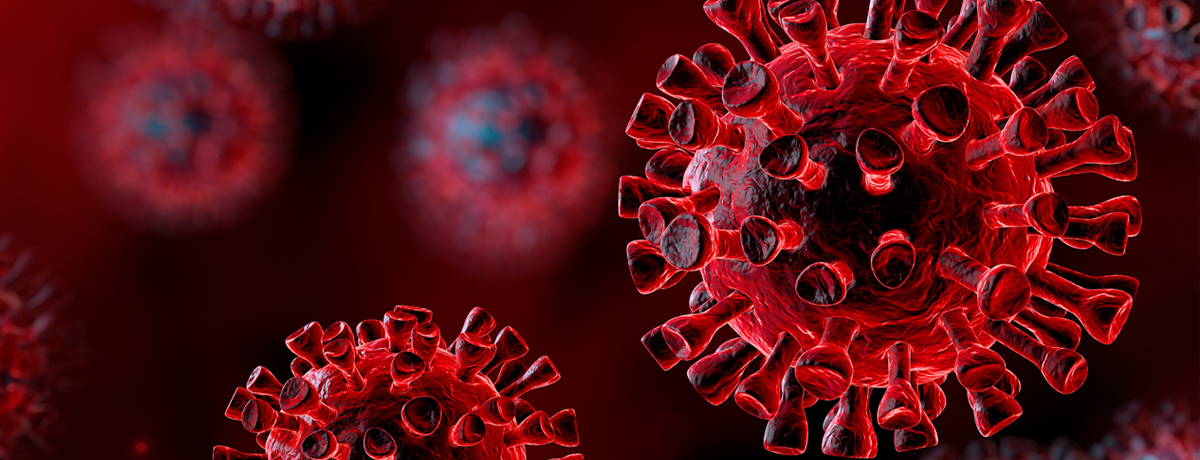

#COVID-19 Dataset

https://www.kaggle.com/datasets/meirnizri/covid19-dataset


###Content

The dataset was provided by the Mexican government (link). This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

1.sex: 1 for female and 2 for male.

2.age: of the patient.

3.classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.

4.patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.

5.pneumonia: whether the patient already have air sacs inflammation or not.

6.pregnancy: whether the patient is pregnant or not.

7.diabetes: whether the patient has diabetes or not.

8.copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.

9.asthma: whether the patient has asthma or not.

10.inmsupr: whether the patient is immunosuppressed or not.

11.hypertension: whether the patient has hypertension or not.

12.cardiovascular: whether the patient has heart or blood vessels related disease.

13.renal chronic: whether the patient has chronic renal disease or not.

14.other disease: whether the patient has other disease or not.

15.obesity: whether the patient is obese or not.

16.tobacco: whether the patient is a tobacco user.

17.usmr: Indicates whether the patient treated medical units of the first, second or third level.

18.medical unit: type of institution of the National Health System that provided the care.

19.intubed: whether the patient was connected to the ventilator.

20.icu: Indicates whether the patient had been admitted to an Intensive Care Unit.

21.date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 ## Load, view data and show analysis on data. ##

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CSE366_Project/CSE366/Covid Data.csv')

In [ ]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [ ]:
df.tail()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97
1048574,2,13,2,1,9999-99-99,97,2,52,97,2,...,2,2,2,2,2,2,2,2,7,97


In [ ]:
#Show all column names
list(df.columns)

['USMER',
 'MEDICAL_UNIT',
 'SEX',
 'PATIENT_TYPE',
 'DATE_DIED',
 'INTUBED',
 'PNEUMONIA',
 'AGE',
 'PREGNANT',
 'DIABETES',
 'COPD',
 'ASTHMA',
 'INMSUPR',
 'HIPERTENSION',
 'OTHER_DISEASE',
 'CARDIOVASCULAR',
 'OBESITY',
 'RENAL_CHRONIC',
 'TOBACCO',
 'CLASIFFICATION_FINAL',
 'ICU']

In [ ]:
# Columns length
print(len(df.columns))

21


In [ ]:
# Number of rows
len(df)

1048575

In [ ]:
# Total cells in the dataset
col = len(df.columns)
row = len(df)

total_cell = col * row
print(total_cell)

22020075


In [ ]:
# Checking null values exists or not
print(df.isna().sum())

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64


## Data Cleaning ##


#### Identifying duplicate values

In [ ]:
df1 = df.apply(lambda x:sum(x.duplicated()))
print(df1)

USMER                   1048573
MEDICAL_UNIT            1048562
SEX                     1048573
PATIENT_TYPE            1048573
DATE_DIED               1048174
INTUBED                 1048571
PNEUMONIA               1048572
AGE                     1048454
PREGNANT                1048571
DIABETES                1048572
COPD                    1048572
ASTHMA                  1048572
INMSUPR                 1048572
HIPERTENSION            1048572
OTHER_DISEASE           1048572
CARDIOVASCULAR          1048572
OBESITY                 1048572
RENAL_CHRONIC           1048572
TOBACCO                 1048572
CLASIFFICATION_FINAL    1048568
ICU                     1048571
dtype: int64


In [ ]:
df.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1048570     True
1048571    False
1048572    False
1048573     True
1048574    False
Length: 1048575, dtype: bool

#### Identifying missing values

In [ ]:
# Find the amount of missing values in each column
df.isna().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [ ]:
# Calculating the percentage of missing values:
percent_missing = df.isnull().sum() * 100 / len(df)
print(percent_missing)

USMER                   0.0
MEDICAL_UNIT            0.0
SEX                     0.0
PATIENT_TYPE            0.0
DATE_DIED               0.0
INTUBED                 0.0
PNEUMONIA               0.0
AGE                     0.0
PREGNANT                0.0
DIABETES                0.0
COPD                    0.0
ASTHMA                  0.0
INMSUPR                 0.0
HIPERTENSION            0.0
OTHER_DISEASE           0.0
CARDIOVASCULAR          0.0
OBESITY                 0.0
RENAL_CHRONIC           0.0
TOBACCO                 0.0
CLASIFFICATION_FINAL    0.0
ICU                     0.0
dtype: float64


#### Visualisation of missing data

<Figure size 720x720 with 0 Axes>

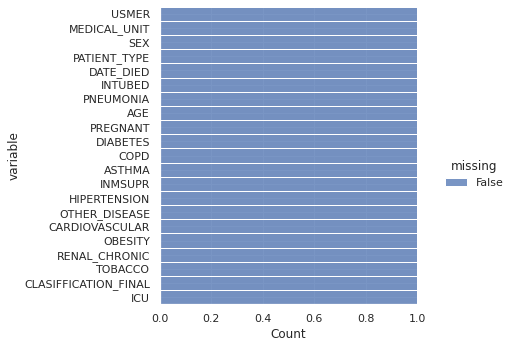

In [ ]:
plt.figure(figsize=(10,10))
sns.displot(
    data= df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing.png", dpi=100)



## Analysing Patterns using Visualisations ##

#### Visualization of column correlation (uses of groupby). Also, plotting heat map

In [ ]:
correlation = df.corr()
correlation

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
USMER,1.000000,0.127927,-0.001126,-0.190570,0.175457,-0.154950,-0.045088,-0.001469,0.014704,0.011030,0.010814,0.003234,0.014830,-0.015763,0.010097,0.014567,0.011527,0.010638,0.028840,0.174901
MEDICAL_UNIT,0.127927,1.000000,0.001475,-0.205413,0.205243,-0.046433,-0.082223,0.005300,0.019523,0.014209,0.013312,0.011785,0.020964,0.027453,0.014406,0.019577,0.014751,0.012282,0.079981,0.205141
SEX,-0.001126,0.001475,1.000000,0.089505,-0.089943,-0.012131,0.028367,0.992713,0.008888,0.009372,0.010415,0.007999,0.009257,0.009039,0.008174,0.009858,0.008249,0.004919,-0.057782,-0.089844
PATIENT_TYPE,-0.190570,-0.205413,0.089505,1.000000,-0.976335,0.022966,0.315193,0.088340,0.008743,0.019548,0.023042,0.024924,0.006852,0.036724,0.022175,0.019650,0.018873,0.022123,-0.183370,-0.975810
INTUBED,0.175457,0.205243,-0.089943,-0.976335,1.000000,0.079743,-0.317945,-0.088097,-0.009215,-0.020124,-0.023446,-0.024140,-0.007628,-0.035404,-0.022442,-0.020217,-0.019309,-0.022428,0.193075,0.999434
PNEUMONIA,-0.154950,-0.046433,-0.012131,0.022966,0.079743,1.000000,-0.073127,-0.007284,-0.004484,-0.005618,-0.005392,-0.000802,-0.004799,0.001612,-0.004758,-0.004276,-0.005287,-0.004325,0.075351,0.079691
AGE,-0.045088,-0.082223,0.028367,0.315193,-0.317945,-0.073127,1.000000,0.027257,0.004422,0.019048,0.022715,0.022820,-0.004964,0.022837,0.019489,0.015500,0.020124,0.021263,-0.152637,-0.317813
PREGNANT,-0.001469,0.005300,0.992713,0.088340,-0.088097,-0.007284,0.027257,1.000000,0.014707,0.015736,0.016765,0.014265,0.015335,0.014175,0.014378,0.015895,0.014392,0.010794,-0.057809,-0.087991
DIABETES,0.014704,0.019523,0.008888,0.008743,-0.009215,-0.004484,0.004422,0.014707,1.000000,0.828823,0.829349,0.781108,0.835018,0.634611,0.809417,0.752739,0.812657,0.771763,-0.004739,-0.009223
COPD,0.011030,0.014209,0.009372,0.019548,-0.020124,-0.005618,0.019048,0.015736,0.828823,1.000000,0.908929,0.852273,0.855249,0.687323,0.880097,0.814868,0.884032,0.836097,-0.010336,-0.020146


Correlation heatmaps are a type of plot that visualize the strength of relationships between numerical variables. Correlation plots are used to understand which variables are related to each other and the strength of this relationship.

**seaborn.heatmap**

Plotting rectangular data as a color-encoded matrix.



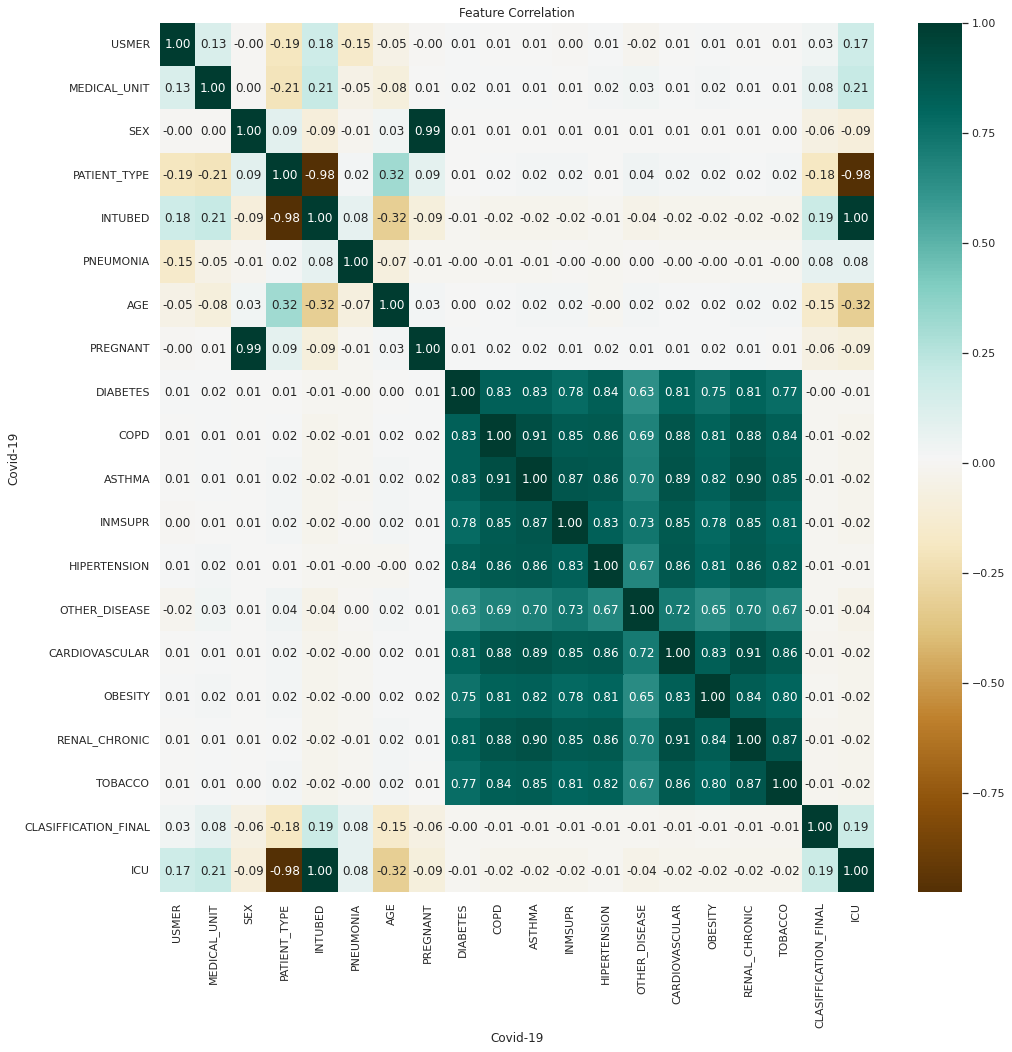

In [ ]:
# Visualisation of the corralation table

fig, ax = plt.subplots(figsize=(16,16)) 
sns.heatmap(df.corr(), annot=True, ax=ax, cmap='BrBG',fmt=".2f").set(
    title = 'Feature Correlation', xlabel = 'Covid-19', ylabel = 'Covid-19')
plt.show()

##### Sex Proportion

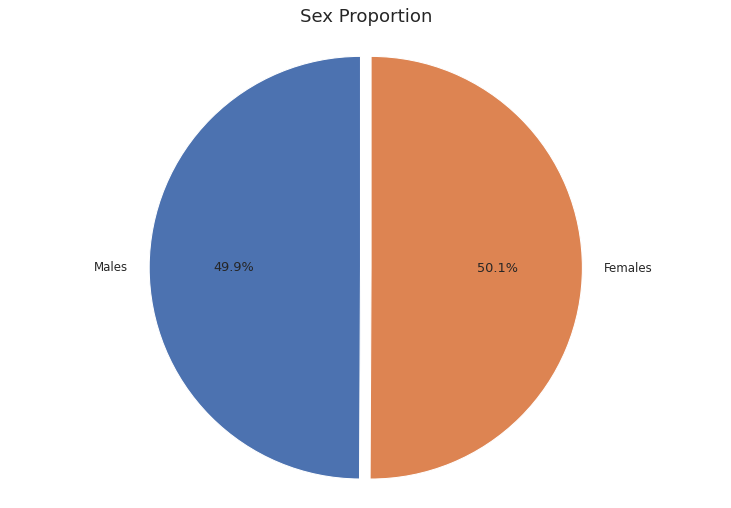

In [ ]:
male = (df['SEX'] == 2).sum()
female = (df['SEX']== 1).sum()
proportions = [male,female]

plt.figure(figsize=(12,8), dpi=77)
plt.pie(proportions, data=df, labels= ['Males', 'Females'], explode = (0.05,0), startangle=90, autopct='%1.1f%%', shadow=False)
plt.axis('equal')
plt.title("Sex Proportion", size=17, pad=13)
plt.show()


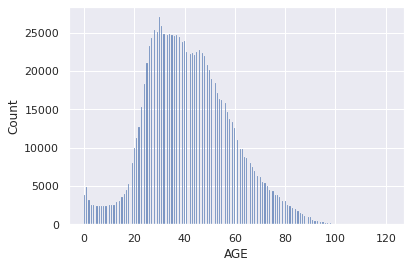

In [ ]:
sns.histplot(data=df['AGE']);

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [ ]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [ ]:
df.rename(columns=lambda x : x.lower(), inplace=True)

In [ ]:
#Parsing of date_died
df['date_parsed']=pd.to_datetime(df['date_died'][df['date_died']!="9999-99-99"], format="%d/%m/%Y")

In [ ]:
df['death'] = [2 if each == "9999-99-99" else 1 for each in df['date_died'] ]

In [ ]:
df['elderly'] = [2 if each < 65 else 1 for each in df['age']]

In [ ]:
df.head()

,usmer,medical_unit,sex,patient_type,date_died,intubed,pneumonia,age,pregnant,diabetes,...,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final,icu,date_parsed,death,elderly
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,2,2,2,3,97,2020-05-03,1,1
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,1,2,5,97,2020-06-03,1,1
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,3,2,2020-06-09,1,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,7,97,2020-06-12,1,2
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,2,2,2,3,97,2020-06-21,1,1


In [ ]:
X = df.drop(columns=['death','date_died', 'date_parsed'], axis=1)
y = df['death']

In [ ]:
X.head()

,usmer,medical_unit,sex,patient_type,intubed,pneumonia,age,pregnant,diabetes,copd,...,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final,icu,elderly
0,2,1,1,1,97,1,65,2,2,2,...,2,1,2,2,2,2,2,3,97,1
1,2,1,2,1,97,1,72,97,2,2,...,2,1,2,2,1,1,2,5,97,1
2,2,1,2,2,1,2,55,97,1,2,...,2,2,2,2,2,2,2,3,2,2
3,2,1,1,1,97,2,53,2,2,2,...,2,2,2,2,2,2,2,7,97,2
4,2,1,2,1,97,2,68,97,1,2,...,2,1,2,2,2,2,2,3,97,1


Number of deaths increased from april, drastically increased form may to july, most deaths conducted in june and decreased highly in september.

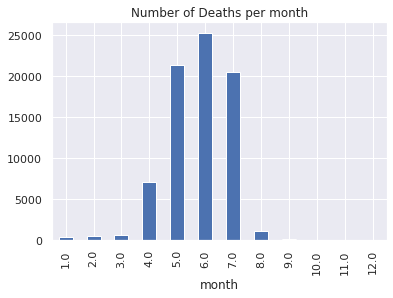

In [ ]:
df['month']=df["date_parsed"].dt.month
df.groupby("month")["death"].count().plot(kind="bar");
plt.title("Number of Deaths per month");

In [ ]:
def perc_die(col_name,has=1, die=1):
    total=df[df[col_name]==has].age.count()
    num_died=df[(df[col_name]==has) & (df['death']==die)].age.count()
    return num_died/total*100

In [ ]:
#Calculate total percentage of death
t = df[df['death']==1].death.count()/df.shape[0]*100
print("total percentage of sample death = {}%".format("%.2f"%t))

total percentage of sample death = 7.34%


In [ ]:
#Calculation of death percentage to detect the effect of each on incidence of death
percen = []
charc_cols=["inmsupr", "pregnant", "asthma","hipertension", "elderly", "obesity", "cardiovascular", "renal_chronic", "tobacco", "other_disease", "copd", "diabetes", "pneumonia"]
for i in charc_cols:
    p = perc_die(i)
    print("Percentage of death of patients with {} is: {}%".format(i, "%.2f"%p))
    percen.append(p)

print("\nMaximum percentage of death is: {}%".format("%.2f"% max(percen))) 
print("\nMaximum percentage of death is: {}%".format("%.2f"% min(percen))) 


Percentage of death of patients with inmsupr is: 18.48%
Percentage of death of patients with pregnant is: 1.09%
Percentage of death of patients with asthma is: 4.69%
Percentage of death of patients with hipertension is: 19.70%
Percentage of death of patients with elderly is: 31.88%
Percentage of death of patients with obesity is: 10.82%
Percentage of death of patients with cardiovascular is: 21.35%
Percentage of death of patients with renal_chronic is: 30.19%
Percentage of death of patients with tobacco is: 7.82%
Percentage of death of patients with other_disease is: 16.21%
Percentage of death of patients with copd is: 26.70%
Percentage of death of patients with diabetes is: 22.61%
Percentage of death of patients with pneumonia is: 38.51%

Maximum percentage of death is: 38.51%

Maximum percentage of death is: 1.09%


Patients who have pneumonia had a low chance of survival and 38.51% of them died where death incidence in pregnant woman is low about 1.09%.

In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: death, dtype: int64

In [ ]:
y.unique()

array([1, 2])

###Training model with 25% test size,
we can change it as we want

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

##Machine Learning Models

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Printing training data after feature scalling

In [ ]:
print(X_train)

[[ 0.7632165   0.81084551 -0.99784955 ...  0.90063097  0.47420817
   0.33362972]
 [ 0.7632165   0.81084551 -0.99784955 ... -1.22585984  0.47420817
   0.33362972]
 [ 0.7632165  -1.60644422  1.00215509 ...  0.90063097  0.47420817
   0.33362972]
 ...
 [ 0.7632165   0.81084551 -0.99784955 ... -2.28910525  0.47420817
   0.33362972]
 [ 0.7632165   0.81084551  1.00215509 ... -1.22585984  0.47420817
   0.33362972]
 [ 0.7632165  -1.33785647 -0.99784955 ... -1.22585984  0.47420817
   0.33362972]]


Printing testing data after feature scalling

In [ ]:
print(X_test)

[[ 0.7632165   0.81084551  1.00215509 ...  0.90063097  0.47420817
   0.33362972]
 [-1.31024421 -0.80068098 -0.99784955 ... -1.22585984  0.47420817
   0.33362972]
 [ 0.7632165   0.81084551  1.00215509 ...  0.90063097  0.47420817
   0.33362972]
 ...
 [ 0.7632165   0.81084551  1.00215509 ...  0.90063097  0.47420817
   0.33362972]
 [ 0.7632165   0.00508227  1.00215509 ...  0.90063097  0.47420817
   0.33362972]
 [-1.31024421 -0.26350548 -0.99784955 ... -1.22585984  0.47420817
   0.33362972]]


#Logistic Regression

In [ ]:

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', max_iter=1000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = classifier.predict(X_test)
print(y_pred)

[2 2 2 ... 2 2 2]


In [ ]:
print(classifier.intercept_)

[4.42217325]


In [ ]:
print(classifier.coef_)

[[ 0.09633599  0.20265968 -0.47912094 -1.82053822  0.61775602  0.22731717
  -0.77043615  0.2860395   0.01156248 -0.04109662 -0.04231265  0.01419158
   0.03346249 -0.0154981  -0.00352362 -0.03065006  0.01713277 -0.02005552
   0.49487527 -1.11348734 -0.00614827]]


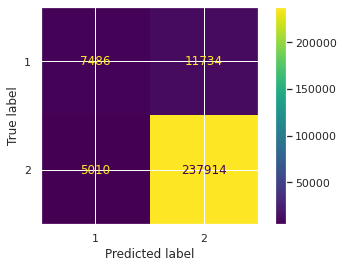

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)

disp.plot()
plt.show()

Classification report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.60      0.39      0.47     19220
           2       0.95      0.98      0.97    242924

    accuracy                           0.94    262144
   macro avg       0.78      0.68      0.72    262144
weighted avg       0.93      0.94      0.93    262144



Accuracy

In [ ]:
acc = accuracy_score(y_test, y_pred)
log_accuracy = acc * 100
print("%.2f" % round(log_accuracy, 2),"%")

93.61 %


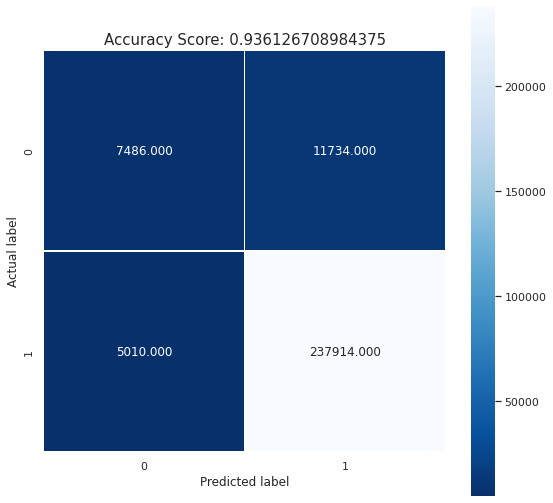

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc)
plt.title(all_sample_title, size = 15);

k-Fold Cross Validation on training set

In [ ]:
from sklearn.model_selection import cross_validate
cv = cross_validate(classifier, X_train, y_train, cv=10)
print(cv['test_score'])
cva= cv['test_score'].mean()
log_cva = cva * 100
print("%.2f" % round(log_cva, 2),"%")

[0.93545598 0.93593835 0.93684117 0.93542973 0.93651056 0.93649784
 0.93606551 0.9345142  0.93576033 0.93647241]
93.59 %


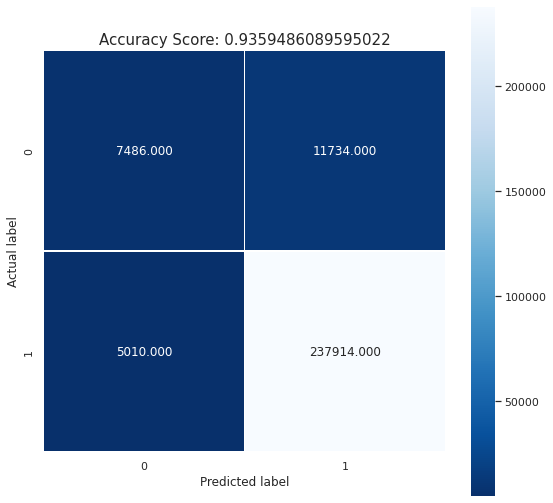

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(cva)
plt.title(all_sample_title, size = 15);

k-Fold Cross validation on test set

In [ ]:
from sklearn.model_selection import cross_validate
cv = cross_validate(classifier, X_test, y_test, cv=10)
print(cv['test_score'])
cva= cv['test_score'].mean()
log_cva = cva * 100
print("%.2f" % round(log_cva, 2),"%")

[0.93518978 0.93656304 0.93724967 0.93618158 0.93427176 0.93663691
 0.93614099 0.9359884  0.93419547 0.9376669 ]
93.60 %


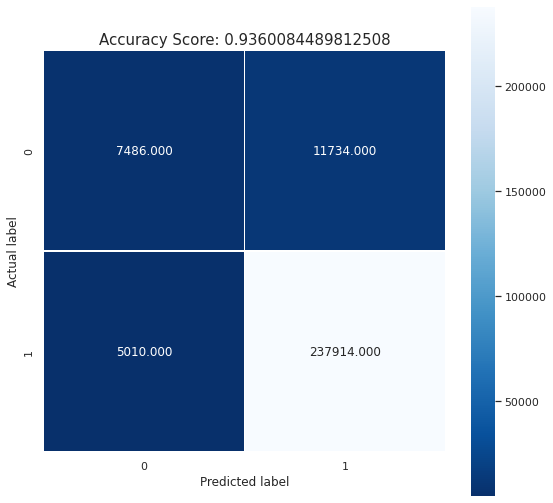

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(cva)
plt.title(all_sample_title, size = 15);

#Decision Tree Classification

In [ ]:
# Training the Decision Tree Classification model on the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
pp = classifier.predict_proba(X_test)
print(pp)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [ ]:
y_pred = classifier.predict(X_test)
print(y_pred)

[2 2 2 ... 2 2 2]


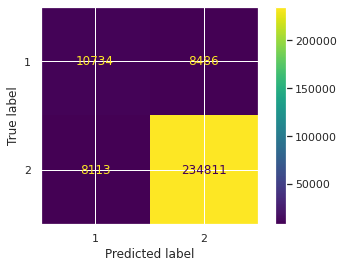

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)

disp.plot()
plt.show()

Classification Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.57      0.56      0.56     19220
           2       0.97      0.97      0.97    242924

    accuracy                           0.94    262144
   macro avg       0.77      0.76      0.76    262144
weighted avg       0.94      0.94      0.94    262144



Accuracy

In [ ]:
acc = accuracy_score(y_test, y_pred)
dt_accuracy = acc * 100
print("%.2f" % round(dt_accuracy, 2),"%")

93.67 %


k-Fold Cross validation on training set

In [ ]:
from sklearn.model_selection import cross_validate
cv = cross_validate(classifier, X_train, y_train, cv=10)
print(cv['test_score'])
cva= cv['test_score'].mean()
dt_cva = cva * 100
print("%.2f" % round(dt_cva, 2),"%")

[0.93671482 0.93776941 0.93679031 0.93705734 0.93761683 0.93616724
 0.93626896 0.93623082 0.93695561 0.9355696 ]
93.67 %


k-Fold Cross validation on testing set

In [ ]:
from sklearn.model_selection import cross_validate
cv = cross_validate(classifier, X_test, y_test, cv=10)
print(cv['test_score'])
cva= cv['test_score'].mean()
dt_cva = cva * 100
print("%.2f" % round(dt_cva, 2),"%")

[0.93171848 0.93251955 0.93530422 0.93374023 0.93129625 0.9329366
 0.93194476 0.93389029 0.9328603  0.93411917]
93.30 %


#Random Forest Classification

In [ ]:
# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(y_pred)

[2 2 2 ... 2 2 2]


In [ ]:
pp = classifier.predict_proba(X_test)
print(pp)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


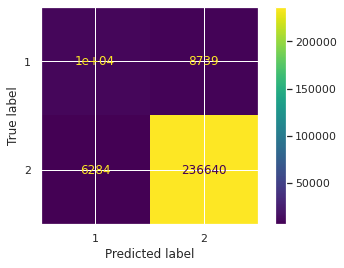

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)

disp.plot()
plt.show()

Classification Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.63      0.55      0.58     19220
           2       0.96      0.97      0.97    242924

    accuracy                           0.94    262144
   macro avg       0.79      0.76      0.78    262144
weighted avg       0.94      0.94      0.94    262144



Accuarcy

In [ ]:
acc = accuracy_score(y_test, y_pred)
rf_accuracy = acc * 100
print("%.2f" % round(rf_accuracy, 2),"%")

94.27 %


k-Fold Cross Validation on training set

In [ ]:
from sklearn.model_selection import cross_validate
cv = cross_validate(classifier, X_train, y_train, cv=10)
print(cv['test_score'])
cva= cv['test_score'].mean()
rf_cva = cva * 100
print("%.2f" % round(rf_cva, 2),"%")

[0.94237323 0.94302099 0.94303371 0.94350419 0.94313543 0.94234706
 0.941813   0.94196559 0.94302099 0.94163498]
94.26 %


k-Fold Cross Validation on testing set

In [ ]:
from sklearn.model_selection import cross_validate
cv = cross_validate(classifier, X_test, y_test, cv=10)
print(cv['test_score'])
cva= cv['test_score'].mean()
rf_cva = cva * 100
print("%.2f" % round(rf_cva, 2),"%")

[0.94011062 0.94125501 0.9418272  0.94125501 0.93945983 0.94087129
 0.94113832 0.94254978 0.9399176  0.93934539]
94.08 %


#Visualisation using `normal accuracy`

In [ ]:
lst = [log_accuracy, dt_accuracy, rf_accuracy]
  
# Calling DataFrame constructor on list
plot_df = pd.DataFrame(lst,columns=["accuracy"],index=['Logistic','DT','RF'] )
plot_df

,accuracy
Logistic,93.612671
DT,93.667984
RF,94.269180


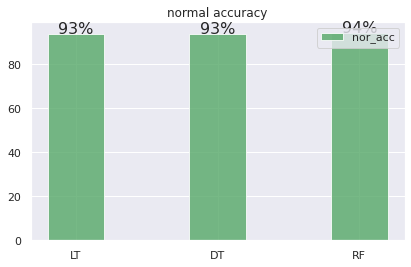

In [ ]:
import numpy as np
import matplotlib.pyplot as plot

n_groups = 3

nor_acc = (93.612671, 93.667984, 94.269180)

fig, ax = plot.subplots()

index = np.arange(n_groups)
bar_width = 0.40

lst1 = plt.bar(index + bar_width, nor_acc, bar_width, color='g', 
    label='nor_acc', alpha= 0.8)


plt.title('normal accuracy')
plt.xticks(index + bar_width, ('LT', 'DT', 'RF'))
plt.legend()

for i in lst1:
    height = i.get_height()
    ax.text(i.get_x() + i.get_width()/2., 0.99*height,
            '%d' % int(height) + "%", ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Visualisation using `Cross Validation Accuracy` 

In [ ]:
lst = [log_cva, dt_cva, rf_cva]
  
# Calling DataFrame constructor on list
cv_plot_df = pd.DataFrame(lst,columns=["accuracy"],index=['Logistic','DT','RF'] )
cv_plot_df

,accuracy
Logistic,93.600845
DT,93.303299
RF,94.077301


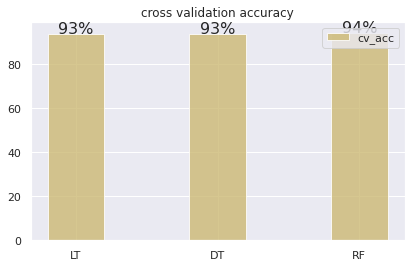

In [ ]:
import numpy as np
import matplotlib.pyplot as plot

n_groups = 3

cv_acc = (93.600845, 93.303299, 94.077301)

fig, ax = plot.subplots()

index = np.arange(n_groups)
bar_width = 0.40

lst2 = plt.bar(index + bar_width, cv_acc, bar_width, color='y', 
    label='cv_acc', alpha= 0.8)


plt.title('cross validation accuracy')
plt.xticks(index + bar_width, ('LT', 'DT', 'RF'))
plt.legend()

for i in lst2:
    height = i.get_height()
    ax.text(i.get_x() + i.get_width()/2., 0.99*height,
            '%d' % int(height) + "%", ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
lst1 = [log_accuracy, dt_accuracy, rf_accuracy]
lst2 = [log_cva, dt_cva, rf_cva]
  
  
plot_df = pd.DataFrame(lst1,columns=["accuracy"],index=['Logistic','DT','RF'] )
cv_plot_df = pd.DataFrame(lst2,columns=["accuracy"],index=['Logistic','DT','RF'] )
print("\n\nNormal accuracy :\n\n",plot_df)
print("\n\nCross validation accuracy :\n\n",cv_plot_df)



Normal accuracy :

            accuracy
Logistic  93.612671
DT        93.667984
RF        94.269180


Cross validation accuracy :

            accuracy
Logistic  93.600845
DT        93.303299
RF        94.077301


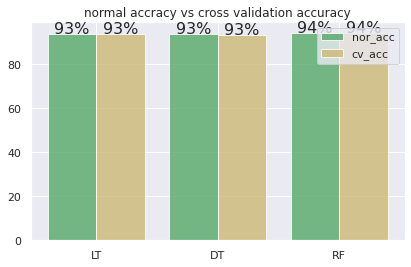

In [ ]:
import numpy as np
import matplotlib.pyplot as plot

n_groups = 3

nor_acc = (93.612671, 93.667984, 94.269180)
cv_acc = (93.600845, 93.303299, 94.077301)

fig, ax = plot.subplots()

index = np.arange(n_groups)
bar_width = 0.40

lst1 = plt.bar(index, nor_acc, bar_width, color='g', 
    label='nor_acc', alpha= 0.8)
lst2 = plt.bar(index + bar_width, cv_acc, bar_width, color='y', 
    label='cv_acc', alpha= 0.8)


plt.title('normal accracy vs cross validation accuracy')
plt.xticks(index + 0.2 , ('LT', 'DT', 'RF'))
plt.legend()

for i in lst1:
    height = i.get_height()
    ax.text(i.get_x() + i.get_width()/2., 0.99*height,
            '%d' % int(height) + "%", ha='center', va='bottom')
for i in lst2:
    height = i.get_height()
    ax.text(i.get_x() + i.get_width()/2., 0.99*height,
            '%d' % int(height) + "%", ha='center', va='bottom')

plt.tight_layout()
plt.show()